# Random Line Generator

Trying to extract random line logic from [here](https://www.apress.com/gp/blog/all-blog-posts/drawing-random-lines-in-python/16975626), and drawing lines using [skimage.draw.line](https://scikit-image.org/docs/stable/api/skimage.draw.html#skimage.draw.line).

Noise is being added by [skimage.draw.bezier_curve](https://scikit-image.org/docs/stable/api/skimage.draw.html#bezier-curve). Maybe we should add some sort of sinusoidal noise, if the bezier curve is to straight, or the global gaussian noise if we don't need curves at all.

In [106]:
import random
import numpy as np
from skimage import draw
import matplotlib.pyplot as plt
from matplotlib import cm

In [99]:
def random_coords(width, height):
    return int(random.random() * width), int(random.random() * height)

In [108]:
def draw_random_lines(numLines, image, dims):
    for _ in range(numLines):
        x0, y0 = random_coords(dims[0], dims[1])
        x1, y1 = random_coords(dims[0], dims[1])
        image[draw.line(x0, y0, x1, y1)] = 255
    
    return image

In [158]:
def draw_bezier_noise(numNoise, image, dims):
    for _ in range(numNoise):
        r0, c0 = random_coords(dims[0], dims[1])
        r1, c1 = random_coords(dims[0], dims[1])
        r2, c2 = random_coords(dims[0], dims[1])
        image[draw.bezier_curve(r0,c0,r1,c1,r2,c2, 0.5)] = 255
    return image

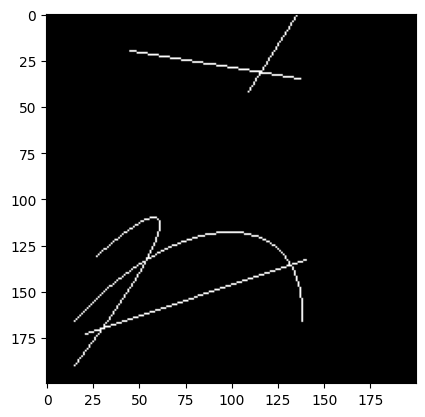

In [162]:
# Constructing random test image
image = np.zeros((200, 200))
image = draw_random_lines(3, image, [200, 200])
image = draw_bezier_noise(2, image, [200, 200])
plt.imshow(image, cmap=cm.gray)